In [5]:
print ('hello project')

hello project


In [6]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Activation,MaxPooling2D,Conv2D

In [7]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

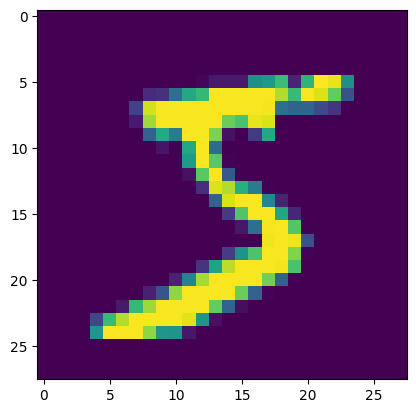

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [12]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

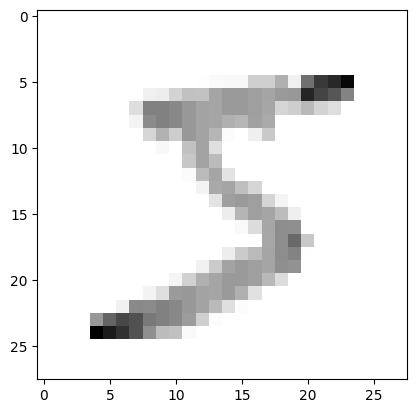

In [13]:
X_train=tensorflow.keras.utils.normalize(X_train,axis=1)
X_test=tensorflow.keras.utils.normalize (X_test, axis=1)
plt.imshow(X_train[0],cmap=plt.cm.binary)


In [14]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
print(y_train[0])

5


In [16]:
import numpy as np
img_size=28
X_trainnr=np.array(X_train).reshape(-1,img_size,img_size,1)
X_testr=np.array(X_test).reshape(-1,img_size,img_size,1)
print("training sample dimension",X_trainnr.shape)
print("testing sample dimension",X_testr.shape)

training sample dimension (60000, 28, 28, 1)
testing sample dimension (10000, 28, 28, 1)


In [17]:


# Assuming img_size is 28 and you have grayscale images (channels=1)
input_shape = (img_size, img_size, 1)

models = Sequential()

models.add(Conv2D(64, (3, 3), input_shape=input_shape))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (3, 3), input_shape=input_shape))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Conv2D(64, (3, 3), input_shape=input_shape))
models.add(Activation('relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))

models.add(Flatten())
models.add(Dense(64))
models.add(Activation('relu'))

models.add(Dense(32))
models.add(Activation('relu'))

models.add(Dense(10))
models.add(Activation('softmax'))

models.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [18]:
models.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
models.fit(X_trainnr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5


1313/1313 [==============================] - 39s 19ms/step - loss: 0.3339 - accuracy: 0.8936 - val_loss: 0.1334 - val_accuracy: 0.9582
Epoch 2/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.1046 - accuracy: 0.9679 - val_loss: 0.0982 - val_accuracy: 0.9696
Epoch 3/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0738 - accuracy: 0.9774 - val_loss: 0.0841 - val_accuracy: 0.9748
Epoch 4/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0587 - accuracy: 0.9820 - val_loss: 0.0694 - val_accuracy: 0.9792
Epoch 5/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0478 - accuracy: 0.9852 - val_loss: 0.0729 - val_accuracy: 0.9788


In [20]:
models.save('mnist_model.h5')

c:\Users\raahu\Desktop\digit recognition\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
test_loss,test_acc=models.evaluate(X_testr,y_test)
print("testloss",test_loss)
print("validation accuracy",test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0670 - accuracy: 0.9806
testloss 0.06703482568264008
validation accuracy 0.9805999994277954


In [22]:
predictions=models.predict([X_testr])
print(predictions)

313/313 [==============================] - 2s 5ms/step
[[1.3449804e-08 1.4461833e-07 2.1045405e-06 ... 9.9994910e-01
  1.3984650e-08 2.9257564e-05]
 [4.5504188e-05 7.7124125e-05 9.9865448e-01 ... 3.6176594e-04
  2.1292144e-05 1.4489749e-06]
 [6.9679157e-07 9.9989998e-01 1.8934833e-06 ... 7.1452087e-06
  6.5767517e-06 5.1376155e-06]
 ...
 [4.9111681e-10 3.9535621e-08 1.0000016e-09 ... 2.8949475e-07
  1.8528408e-05 1.0307337e-03]
 [3.9461204e-07 8.7709884e-09 3.0103243e-11 ... 2.0785592e-11
  2.0383333e-05 1.4159384e-07]
 [4.6441131e-05 7.9139568e-07 5.0436225e-05 ... 7.0883857e-07
  4.2742563e-06 6.7755182e-06]]


In [23]:
print(np.argmax(predictions[0]))

7


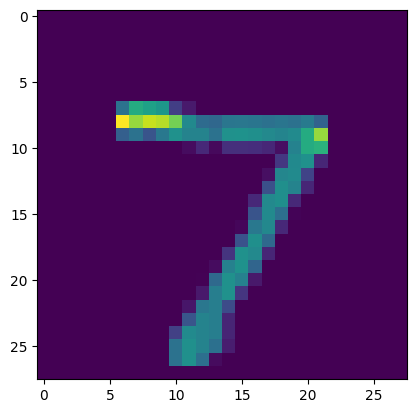

In [24]:
plt.imshow(X_test[0])

In [25]:
print(np.argmax(predictions[129]))

5


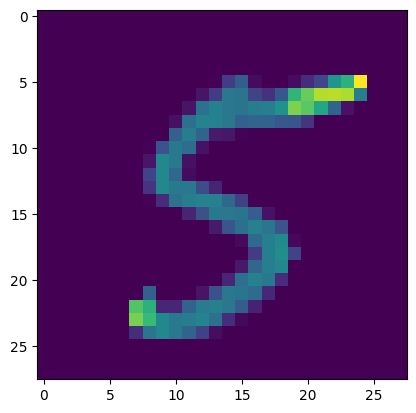

In [26]:
plt.imshow(X_test[129])

In [27]:
import cv2

In [28]:
pip install opencv-python



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
img=cv2.imread('static\canvas\canvas_image_20240106150815100028.png')

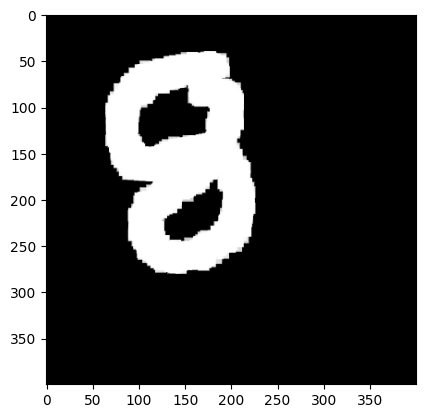

In [55]:
plt.imshow(img)

In [56]:
img.shape

(400, 400, 3)

In [57]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [58]:
gray.shape

(400, 400)

In [59]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [60]:
resized.shape

(28, 28)

In [61]:
newimg=tensorflow.keras.utils.normalize(resized,axis=1)

In [62]:
newimg=np.array(newimg).reshape(-1,img_size,img_size,1)

In [63]:
newimg.shape

(1, 28, 28, 1)

In [64]:
predictions=models.predict(newimg)

1/1 [==============================] - 0s 31ms/step


In [65]:
print(np.argmax(predictions))

8
